In [2]:
import pandas as pd
import numpy as np

# Importing and Reading the Data

In [3]:
file = pd.read_csv('customer_churn.csv')

In [4]:
# checking the shape of the DataFrame
file.shape

(7043, 21)

In [5]:
#display (file.head())

# Data cleaning

In [6]:
# checking the data types
file.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# checking for NaN values
file.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
file.columns = [e.lower() for e in file.columns]

# Data splitting

In [9]:
# importing relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# bringing X and y down for easy referencing
y = file[['churn']]
X = file[['tenure', 'seniorcitizen', 'monthlycharges']]

In [11]:
# splitting data into train_set and test_set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =42)

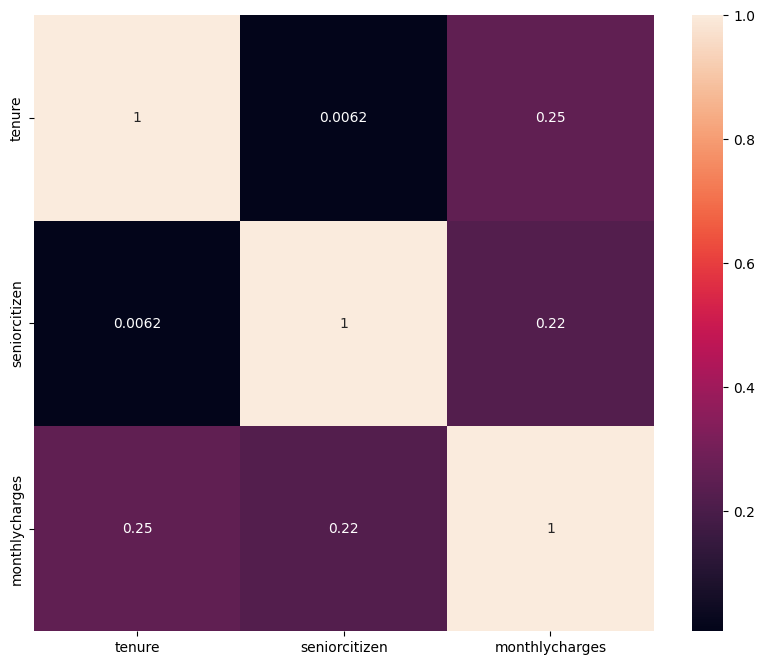

In [12]:
import matplotlib.pyplot as plt
# looking for multicolinearity 
corr_matrix=X_train.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [13]:
X_train

,tenure,seniorcitizen,monthlycharges
6607,1,0,25.30
2598,7,0,75.15
2345,4,0,20.05
4093,29,0,76.00
693,3,0,75.10
...,...,...,...
3772,1,0,95.00
5191,23,0,91.10
5226,12,0,21.15
5390,12,1,99.45


In [14]:
# explore the data by ploting distributions for numericals
# def distrplots(X):
#     sns.displot(X_train['tenure'])
#     plt.show()

#     sns.displot(X_train['monthlycharges'])
#     plt.show()
    
# distrplots(X)

In [15]:
# importing the required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns) # transforming X_train
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns) # trasforming X_test
X_train_scaled.head()

# # appying scaling tp the numericaldata to normalize them into same level of between 0 and 1
# transformer = MinMaxScaler().fit(X_train) # to use for X_test too
# X_train_scaled_arr = transformer.transform(X_train)
# X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train.columns)
# X_train_scaled.head()

,tenure,seniorcitizen,monthlycharges
0,-1.282882,-0.436091,-1.310046
1,-1.037857,-0.436091,0.344832
2,-1.160369,-0.436091,-1.484331
3,-0.139429,-0.436091,0.373049
4,-1.201207,-0.436091,0.343172


In [16]:
y_train = y_train.reset_index(drop=True) # resetting the index of y_train to comform with that of x_train_scaled.
y_test = y_test.reset_index(drop=True)  # resetting the index of y_test to comform with that of x_train_scaled 

# Checking for Linearity in the Data using Logit and Model Application

In [17]:
# importing the relevant libraries and applying the model on the data
from sklearn.linear_model import LogisticRegression

LogReg  = LogisticRegression(random_state=0, solver='lbfgs')
LogReg .fit(X_train_scaled, y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [18]:
LogReg .predict_proba(X_train_scaled)

array([[0.73945274, 0.26054726],
       [0.46717007, 0.53282993],
       [0.79572677, 0.20427323],
       ...,
       [0.85219045, 0.14780955],
       [0.23842026, 0.76157974],
       [0.9266377 , 0.0733623 ]])

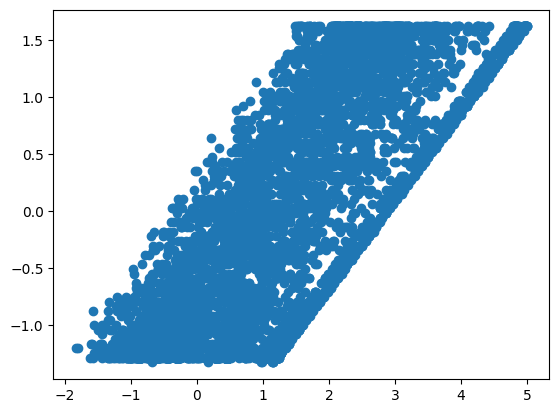

In [19]:
logits = np.log(1/LogReg.predict_proba(X_train_scaled)[:,1]-1) # scatter plot to determine linearity in the tenure data
plt.scatter(logits,X_train_scaled['tenure'])

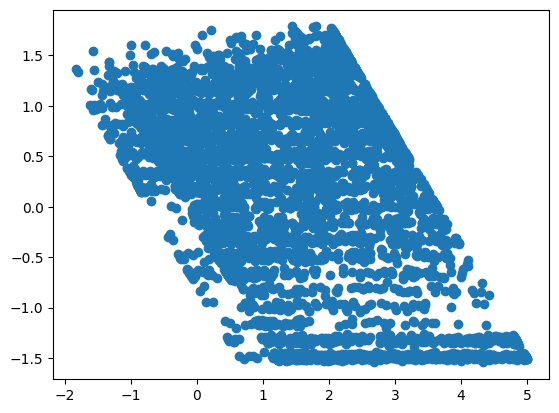

In [20]:
plt.scatter(logits,X_train_scaled['monthlycharges'])  # scatter plot to determine linearity in the monthlycharges data

# Imbalance and metrics

<Axes: xlabel='seniorcitizen'>

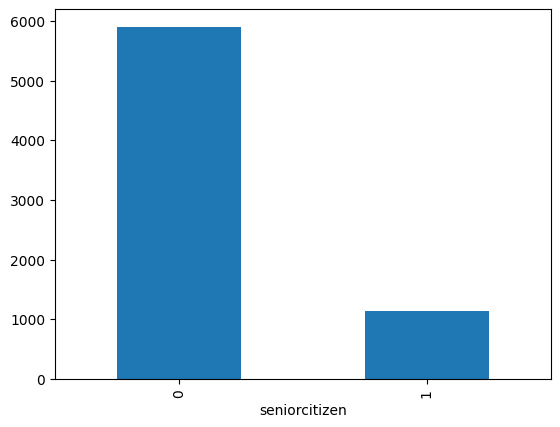

In [21]:
# while there are more imbalanced datasets, we have a significant imbalance
# and the cost of failing to detect the minority class is quite high (lack of diagnosis of diabetes)
count_classes = file['seniorcitizen'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [22]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=0, solver='lbfgs')
LogReg .fit(X_train_scaled, y_train)
LogReg .score(X_test_scaled, y_test)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7978421351504826

In [23]:
#while accuracy is not absolutely terrible, a closer look reveals some serious problems
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LogReg.predict(X_test_scaled)

print("accuracy:"   ,accuracy_score(y_test, pred))
print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))


accuracy: 0.7978421351504826
precision:  0.6964856230031949
recall:  0.4551148225469729
f1:  0.5505050505050505


In [24]:
#we a certain percentage of churn is unidentifiable
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1187,   95],
       [ 261,  218]], dtype=int64)

A simple model can achieve more than 70% accuracy depending on the dataset; if the dataset is clearly difined without ambiguity, a simple model will work wonders since it can easily distinguish between all features. Also, not just distinquishing between features, but also, the quality of the dataset plays a significant role in enhancing the performance of the simplest of models.

Another factor is the simplicity of the task a model handles; dealing with few classes or features, with well-separated data points can easily be handled by simple models. Furthermore, models tend to align with the majority category to give a good percentage, but this does not necessarily mean the outcome is realistic enough.  In general, the overall performance of any model depends on the knowledge and experience of the analyst in knowing when to apply which model on which problem.

# Applying SMOTE to correct the Imbalance in the Data

In [25]:
#!pip install imblearn                       # intalling imlearn and importing SMOTE
from imblearn.over_sampling import SMOTE

In [26]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [27]:
X_train_SMOTE.shape

(7784, 3)

In [28]:
# the application of the SMOTE algorithm improves the model a bit with the prediction moving from 257 to 431; an increase 
# of 174 True positives
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=0, solver='lbfgs')
LogReg.fit(X_train_SMOTE, y_train_SMOTE)
pred = LogReg.predict(X_test_scaled)
print("accuracy:",accuracy_score(y_test, pred))
print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

accuracy: 0.7410562180579217
precision:  0.5162659123055162
recall:  0.7620041753653445
f1:  0.6155143338954469


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
#we a certain percentage of churn is unidentifiable
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[940, 342],
       [114, 365]], dtype=int64)